In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf

In [69]:
path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/UV_vis/Chlorophyll_extract/"

fig_folder = path + "Figures/"
if not os.path.exists(fig_folder):
    os.makedirs(fig_folder)

data = pd.read_csv(path + "Chlorophyll_extract" + ".csv", sep=";", decimal=".")

data.extract = data.extract - data.blank
data.extract_diluted = data.extract_diluted - data.blank

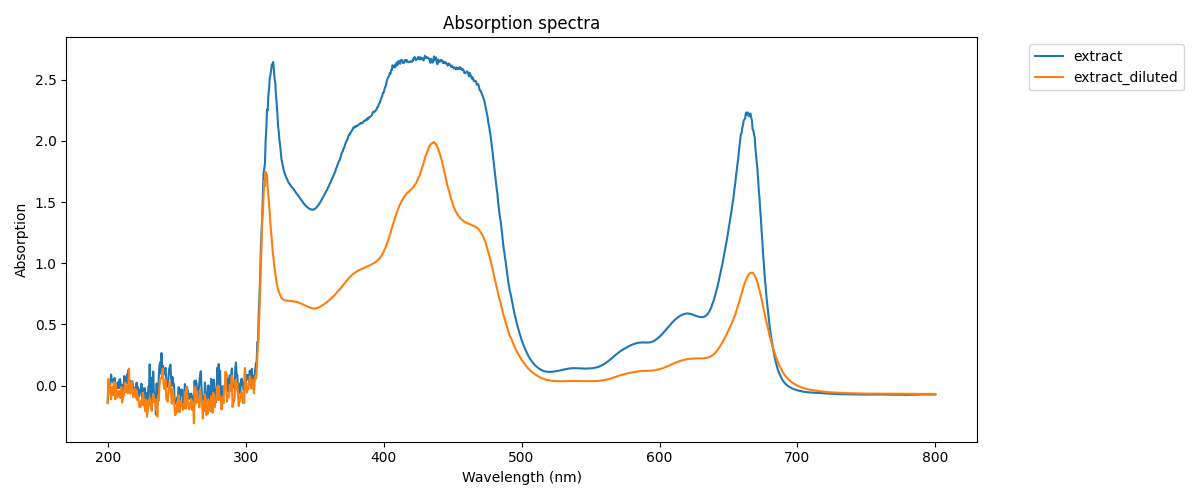

In [71]:
fig, ax = plt.subplots(figsize=(12, 5))

for i in data.keys()[2:]:
    ax.plot(data.wavelength, data[i], label=i)
ax.set_title("Absorption spectra") 
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Absorption")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.tight_layout()
fig.savefig(fig_folder + "abs.png", dpi = 300)

In [75]:
reference_spectra = pd.read_csv(path + "mmc3" + ".txt", sep="\t", decimal=".")
reference_spectra

In [86]:
reference_spectra_carotenoids = pd.read_csv(path + "mmc2" + ".txt", sep="\t", decimal=".")
reference_spectra_carotenoids

,wavelength,Peridinin,19'-Butanoyloxyfucoxanthin,Fucoxanthin,Neoxanthin,Prasinoxanthin,19'-keto-hexanoyloxyfucoxanthin,Violaxanthin,19'-hexanoyloxyfucoxanthin,Astaxanthin,...,Alloxanthin,Myxoxanthophyll,Diatoxanthin,Zeaxanthin,Lutein,Canthaxanthin,Gyroxanthin diester,Echinenone,"B,e-carotene","B,B-carotene"
0,800.2,0.000229,0.000524,0.000629,0.001282,0.000128,0.001014,0.000128,-0.000562,0.000261,...,0.000376,0.000863,0.000162,0.000427,0.000285,0.000257,0.000855,0.000404,0.000153,0.000989
1,799.3,0.000226,0.000452,0.000588,0.001203,0.000166,0.000957,0.000166,-0.000505,0.000298,...,0.000305,0.000920,0.000158,0.000272,0.000192,0.000390,0.000645,0.000433,0.000168,0.001011
2,798.5,0.000222,0.000533,0.000599,0.001197,0.000165,0.000912,0.000253,-0.000521,0.000086,...,0.000266,0.000834,0.000109,0.000448,0.000160,0.000312,0.000692,0.000506,-0.000023,0.000991
3,797.6,0.000179,0.000599,0.000548,0.001058,0.000216,0.000932,0.000310,-0.000565,0.000163,...,0.000466,0.000806,0.000561,0.000302,0.000074,0.000398,0.000705,0.000505,0.000211,0.000872
4,796.7,0.000314,0.000520,0.000491,0.001197,0.000086,0.000995,0.000241,-0.000518,0.000266,...,0.000350,0.000671,0.000351,0.000334,0.000107,0.000352,0.000742,0.000270,0.000225,0.000923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,324.0,0.004911,0.002853,0.003124,0.004100,0.002171,0.002817,0.002180,0.002132,-0.007623,...,0.001653,-0.006010,0.002290,0.002630,0.002855,0.033757,0.006598,0.008531,-0.009826,0.010266
559,323.1,0.005044,0.002717,0.003056,0.003789,0.002062,0.002800,0.001900,0.001899,-0.008467,...,0.001566,-0.007385,0.002154,0.002632,0.002716,0.039906,0.006467,0.009254,-0.010767,0.009325
560,322.3,0.005224,0.002671,0.003098,0.003741,0.002207,0.002656,0.001782,0.002003,-0.010106,...,0.001514,-0.008708,0.001898,0.002819,0.002667,0.046801,0.006542,0.009895,-0.012624,0.010025
561,321.4,0.005305,0.002542,0.003092,0.003668,0.002202,0.002800,0.001673,0.001894,-0.009871,...,0.001512,-0.009052,0.001704,0.002870,0.002562,0.053753,0.006221,0.010801,-0.012567,0.009296


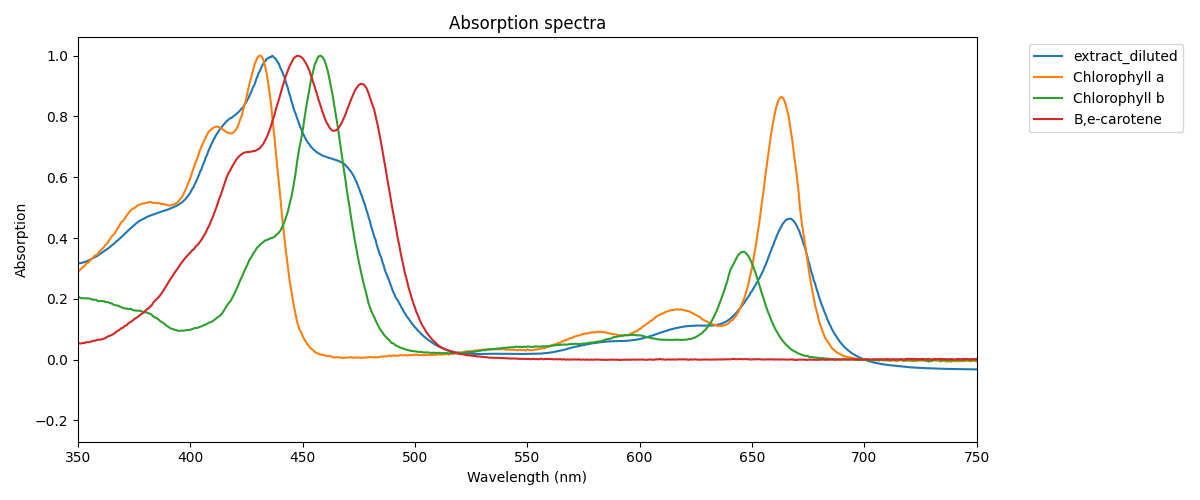

In [89]:
fig, ax = plt.subplots(figsize=(12, 5))

for i in data.keys()[3:]:
    ax.plot(data.wavelength, data[i]/max(data[i]), label=i)
ax.set_title("Absorption spectra") 
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Absorption")


ax.plot(reference_spectra.wavelength, reference_spectra["Chlorophyll-a"]/max(reference_spectra["Chlorophyll-a"]), label="Chlorophyll a")
ax.plot(reference_spectra.wavelength, reference_spectra["Chlorophyll-b"]/max(reference_spectra["Chlorophyll-b"]), label="Chlorophyll b")
ax.plot(reference_spectra_carotenoids.wavelength, reference_spectra_carotenoids["B,e-carotene"]/max(reference_spectra_carotenoids["B,e-carotene"]), label="B,e-carotene")

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlim(350, 750)



fig.tight_layout()
fig.savefig(fig_folder + "abs.png", dpi = 300)

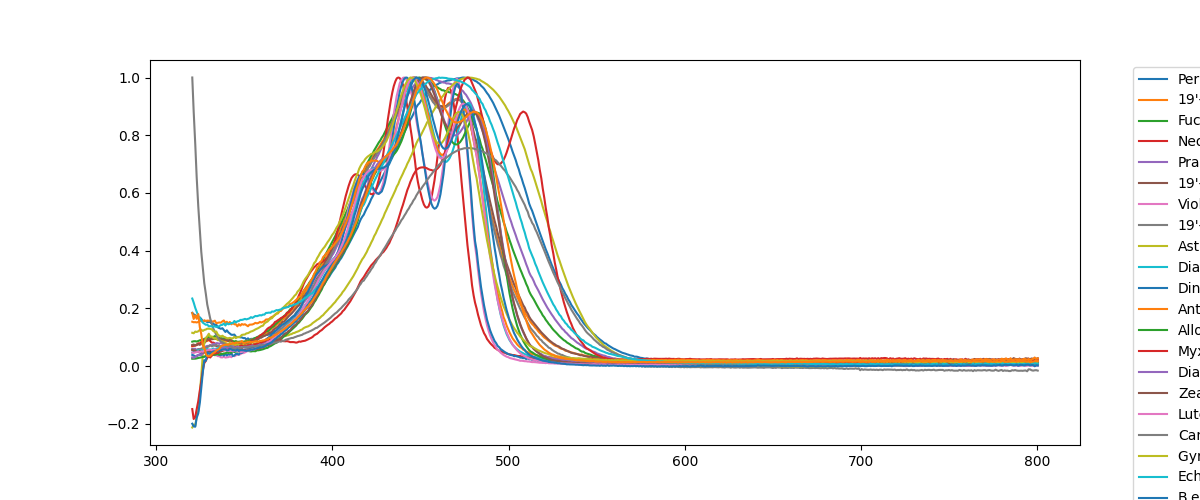

In [87]:
fig, ax = plt.subplots(figsize=(12, 5))
for i in reference_spectra_carotenoids.keys()[1:]:
    ax.plot(reference_spectra_carotenoids.wavelength, reference_spectra_carotenoids[i]/max(reference_spectra_carotenoids[i]), label=i)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')